In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Rotation matrix from axis and angle
The matrix of a proper rotation R by angle \theta around an axis
$$ u = (u_x,u_y,u_z) $$
a unit vector where its norm is one, is given by
$$ R = \begin{bmatrix} cos\theta + u_x^2(1-cos\theta) & u_x u_y(1-cos\theta)-u_z sin\theta & u_x u_z(1-cos\theta)+u_y sin\theta \\ u_y u_x(1-cos\theta)+u_z sin\theta & cos\theta + u_y^2(1-cos\theta) & u_y u_z(1-cos\theta)-u_x sin\theta \\ u_z u_x(1-cos\theta)-u_y sin\theta & u_z u_y(1-cos\theta)+u_x sin\theta & cos\theta + u_z^2(1-cos\theta) \end{bmatrix} $$

In [2]:
def rotateVector(vec,axis,rot_num):
    ux = axis[0]
    uy = axis[1]
    uz = axis[2]
    deg = math.pi*(rot_num/2)
    mcos = math.cos(deg)
    msin = math.sin(deg)
    vec_sum = np.sum(vec)
    new_dir = [0,0,0]
    if abs(vec[0])>0:
        new_dir = [mcos+ux*ux*(1-mcos) , uy*ux*(1-mcos)+uz*msin , uz*ux*(1-mcos)-uy*msin]
    elif abs(vec[1])>0:
        new_dir = [ux*uy*(1-mcos)-uz*msin , mcos+uy*uy*(1-mcos) , uz*uy*(1-mcos)+ux*msin]
    elif abs(vec[2])>0:
        new_dir = [ux*uz*(1-mcos)+uy*msin , uy*uz*(1-mcos)-ux*msin , mcos+uz*uz*(1-mcos)]
    return [-round(new_dir[0]*vec_sum),-round(new_dir[1]*vec_sum),-round(new_dir[2]*vec_sum)]

In [3]:
def ChainCode(chain_elmts):
    points = []
    initial_point = [0,0,1]  # x,y,z
    act_point = initial_point
    pre_dir = initial_point
    pre_pre_dir = [-1,0,0]
    points.append([1,0,0])
    points.append([0,0,0])
    points.append(act_point)
    for echar in chain_elmts:
        x = act_point[0]
        y = act_point[1]
        z = act_point[2]
        code_num = int(echar)
        if code_num==0:
            act_point = [x+pre_dir[0],y+pre_dir[1],z+pre_dir[2]]
            actual_point = [x,y,z+1]
        else:
            new_dir = rotateVector(pre_pre_dir,pre_dir,code_num)
            pre_pre_dir = pre_dir.copy()
            pre_dir = new_dir.copy()
            act_point = [x+new_dir[0],y+new_dir[1],z+new_dir[2]]
        if act_point in points:
            break
        points.append(act_point)
    return points

# 3D Chain code


In [4]:
chain_code = input("Chain code: ")
chain_elements = list(chain_code)
for echar in chain_elements:
    if (int(echar)<0 or int(echar)>4):
        print("Error: code elementes must be in [0,4] interval")
        break

Chain code: 13421301


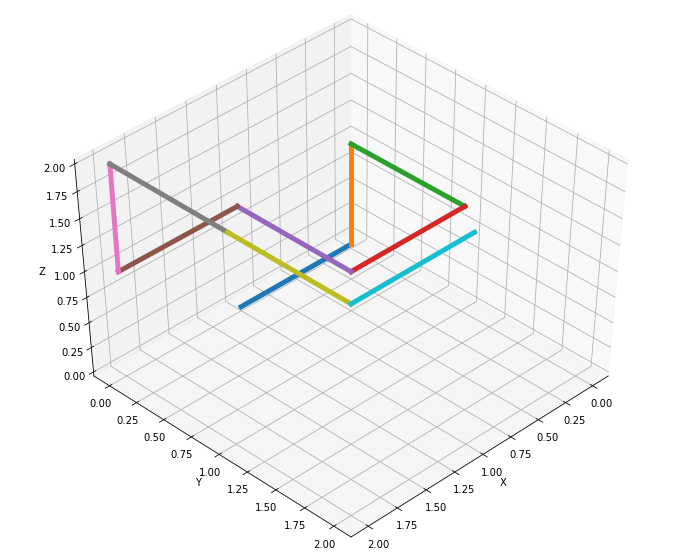

In [5]:
points = ChainCode(chain_elements)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
prev_point = points[0]
for i in range(1,len(points)):
    act_point = points[i]
    ax.plot([prev_point[0],act_point[0]],[prev_point[1],act_point[1]],zs=[prev_point[2],act_point[2]],linewidth=5)
    prev_point = act_point.copy()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(45, 45)